# Chinese Market Overview

### Sectors
* Technology 
* Consumer Cyclicals
* Basic Materials
* Financials
* Industrials
* Healthcare
* Consumer Non-Cyclicals
* Energy
* Utilities
* Real Estate

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress

In [11]:
def create_dfs(path):
    dfs = pd.read_excel(file_path, sheet_name=None)
    for sheet_name, df in dfs.items():
        df.name = sheet_name    
    return dfs

In [12]:
file_path = "/Users/ellaxu/Desktop/Spring 2024/FinalThesis/Final_Thesis_Data.xlsx" 
dfs = create_dfs(file_path)
for sheet_name, df in dfs.items():
    print(f"DataFrame name: {sheet_name}")
    print(df)

DataFrame name: Technology
     Identifier                                  Company Name  \
0     002475.SZ            Luxshare Precision Industry Co Ltd   
1     000063.SZ                                      ZTE Corp   
2     002415.SZ  Hangzhou Hikvision Digital Technology Co Ltd   
3     002236.SZ              Zhejiang Dahua Technology Co Ltd   
4     000725.SZ                   BOE Technology Group Co Ltd   
...         ...                                           ...   
1007  603082.SS   RIAMB Beijing Technology Development Co Ltd   
1008  688709.SS     Chengdu Sino Microelectronics Tech Co Ltd   
1009  688584.SS                   Wafer Works Shanghai Co Ltd   
1010  301589.SZ                     XiAn NovaStar Tech Co Ltd   
1011  603341.SS          Shanghai Longcheer Technology Co Ltd   

     Country of Exchange TRBC Economic Sector Name  ESG Score\n(FY0)       ROC  
0                  China                Technology         91.471631  0.176165  
1                  China      

In [13]:
for sheet_name, df in dfs.items():
    print(f"DataFrame name: {sheet_name}")
    print(f"Length of DataFrame: {len(df)}\n")

DataFrame name: Technology
Length of DataFrame: 1012

DataFrame name: Basic Materials
Length of DataFrame: 859

DataFrame name: Consumer Cyclicals
Length of DataFrame: 755

DataFrame name: Financials
Length of DataFrame: 158

DataFrame name: Industrials
Length of DataFrame: 1411

DataFrame name: Healthcare
Length of DataFrame: 499

DataFrame name: Consumer Non-Cyclicals
Length of DataFrame: 296

DataFrame name: Energy
Length of DataFrame: 146

DataFrame name: Utilities
Length of DataFrame: 142

DataFrame name: Real Estate
Length of DataFrame: 138



In [14]:
number_dic={}
for sheet_name, df in dfs.items():
    df = df.dropna(axis=0, how='any')
    mean_value_ESG = df['ESG Score\n(FY0)'].mean()
    mean_value_ROC = df['ROC'].mean()
    number_dic[sheet_name] = [len(df),mean_value_ESG, mean_value_ROC]
    dfs[sheet_name] = df
    print(f"DataFrame name: {sheet_name}")
    print(f"Length of DataFrame: {len(df)}\n")
print(number_dic)

DataFrame name: Technology
Length of DataFrame: 170

DataFrame name: Basic Materials
Length of DataFrame: 163

DataFrame name: Consumer Cyclicals
Length of DataFrame: 95

DataFrame name: Financials
Length of DataFrame: 52

DataFrame name: Industrials
Length of DataFrame: 191

DataFrame name: Healthcare
Length of DataFrame: 105

DataFrame name: Consumer Non-Cyclicals
Length of DataFrame: 66

DataFrame name: Energy
Length of DataFrame: 47

DataFrame name: Utilities
Length of DataFrame: 35

DataFrame name: Real Estate
Length of DataFrame: 34

{'Technology': [170, 38.51391757837461, 0.05808635172682942], 'Basic Materials': [163, 39.592395548734395, 0.07063786197188957], 'Consumer Cyclicals': [95, 34.37071406525158, 0.06983589362081052], 'Financials': [52, 47.50448875139937, 0.02701051938205769], 'Industrials': [191, 38.15434491130095, 0.07599432573444502], 'Healthcare': [105, 42.43519849287541, 0.08453465188105715], 'Consumer Non-Cyclicals': [66, 36.43284357871176, 0.12474015333237878], 'E

In [15]:
dfs['Technology']

,Identifier,Company Name,Country of Exchange,TRBC Economic Sector Name,ESG Score\n(FY0),ROC
0,002475.SZ,Luxshare Precision Industry Co Ltd,China,Technology,91.471631,0.176165
1,000063.SZ,ZTE Corp,China,Technology,89.479682,0.082531
2,002415.SZ,Hangzhou Hikvision Digital Technology Co Ltd,China,Technology,79.662611,0.167861
3,002236.SZ,Zhejiang Dahua Technology Co Ltd,China,Technology,76.068561,0.103529
4,000725.SZ,BOE Technology Group Co Ltd,China,Technology,75.545520,-0.006762
...,...,...,...,...,...,...
168,002185.SZ,Tianshui Huatian Technology Co Ltd,China,Technology,9.407624,0.007984
169,300115.SZ,Shenzhen Everwin Precision Technology Co Ltd,China,Technology,9.109590,0.027213
170,300604.SZ,Hangzhou Changchuan Technology Co Ltd,China,Technology,7.035572,0.065688
171,603893.SS,Rockchip Electronics Co Ltd,China,Technology,4.816903,0.033698


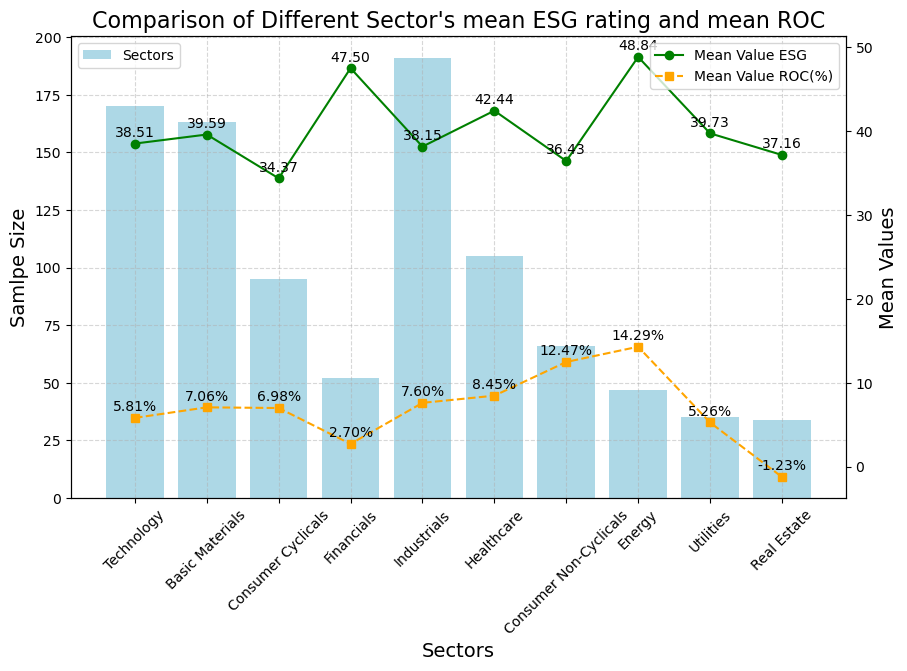

In [16]:
sheet_names = list(number_dic.keys())
len_df = [value[0] for value in number_dic.values()]
mean_value_ESG = [value[1] for value in number_dic.values()]
mean_value_ROC = [value[2] * 100 for value in number_dic.values()]  # Convert ROC to percentage

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(sheet_names, len_df, color='lightblue', label='Sectors')

ax1.set_xlabel('Sectors', fontsize=14)
ax1.set_ylabel('Samlpe Size', fontsize=14)
ax1.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better visibility

ax2 = ax1.twinx()

ax2.plot(sheet_names, mean_value_ESG, color='green', marker='o', label='Mean Value ESG')

ax2.plot(sheet_names, mean_value_ROC, color='orange', marker='s', linestyle='--', label='Mean Value ROC(%)')

ax2.set_ylabel('Mean Values', fontsize=14)
for i, (esg, roc) in enumerate(zip(mean_value_ESG, mean_value_ROC)):
    ax2.annotate(f'{esg:.2f}', (i, esg), textcoords="offset points", xytext=(0,5), ha='center')
    ax2.annotate(f'{roc:.2f}%', (i, roc), textcoords="offset points", xytext=(0,5), ha='center')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.5)

plt.title("Comparison of Different Sector's mean ESG rating and mean ROC", fontsize=16)
#plt.savefig('/Users/ellaxu/Desktop/Spring 2024/FinalThesis/fig1.png')
plt.show()

In [17]:
regression_results = {}

for sheet_name, df in dfs.items():
    esg_score = df['ESG Score\n(FY0)']
    roc = df['ROC']
    slope, intercept, r_value, p_value, std_err = linregress(roc, esg_score)
    regression_results[sheet_name] = {
        'Slope': slope,
        'Intercept': intercept,
        'R-squared': r_value**2,
        'P-value': p_value,
        'Standard Error': std_err
    }


for sheet_name, result in regression_results.items():
    print(f"Linear Regression Results for {sheet_name}:")
    for key, value in result.items():
        print(f"{key}: {value:.2f}")
    print("\n")
print(regression_results)

Linear Regression Results for Technology:
Slope: 14.31
Intercept: 37.68
R-squared: 0.01
P-value: 0.12
Standard Error: 9.20


Linear Regression Results for Basic Materials:
Slope: 3.84
Intercept: 39.32
R-squared: 0.00
P-value: 0.77
Standard Error: 13.10


Linear Regression Results for Consumer Cyclicals:
Slope: 10.77
Intercept: 33.62
R-squared: 0.01
P-value: 0.43
Standard Error: 13.50


Linear Regression Results for Financials:
Slope: -97.95
Intercept: 50.15
R-squared: 0.01
P-value: 0.43
Standard Error: 122.16


Linear Regression Results for Industrials:
Slope: -9.44
Intercept: 38.87
R-squared: 0.00
P-value: 0.53
Standard Error: 15.19


Linear Regression Results for Healthcare:
Slope: 18.71
Intercept: 40.85
R-squared: 0.01
P-value: 0.22
Standard Error: 15.09


Linear Regression Results for Consumer Non-Cyclicals:
Slope: 12.93
Intercept: 34.82
R-squared: 0.02
P-value: 0.22
Standard Error: 10.48


Linear Regression Results for Energy:
Slope: 10.15
Intercept: 47.39
R-squared: 0.00
P-value:

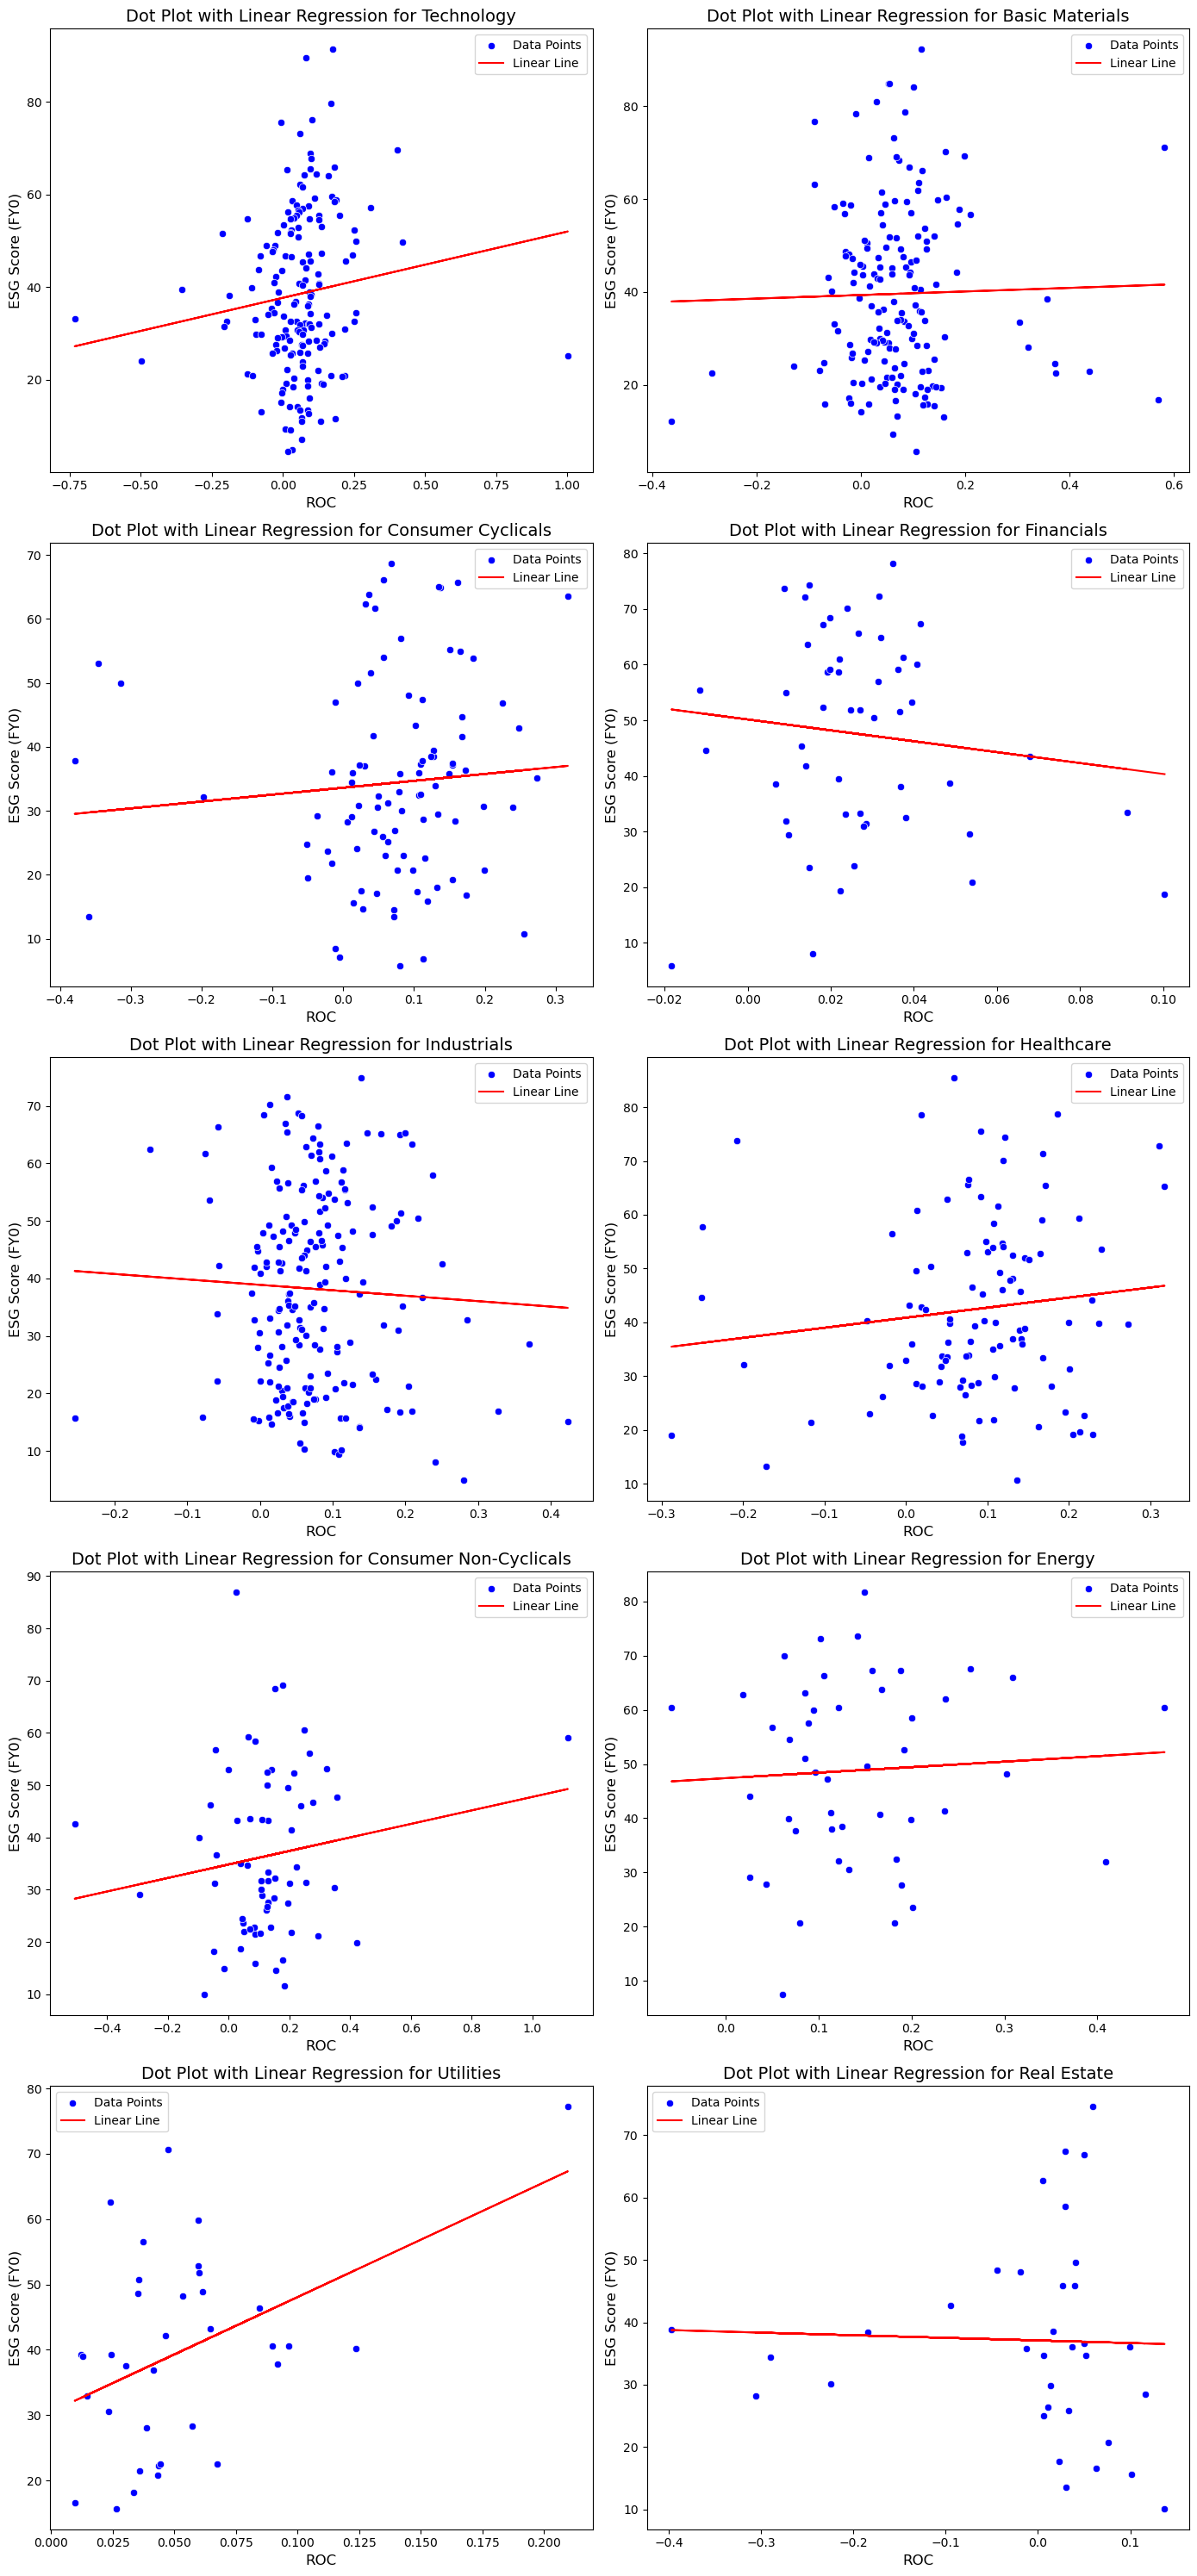

In [25]:
num_rows = int(np.ceil(len(dfs) / 2))  # Divide by 2 to create 2 columns
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 6 * num_rows))

axes = axes.flatten()
for i, (sheet_name, df) in enumerate(dfs.items()):
    esg_score = df['ESG Score\n(FY0)']
    roc = df['ROC']
    slope, intercept, _, _, _ = linregress(roc , esg_score)
    sns.scatterplot(x=roc, y=esg_score, color='blue', ax=axes[i], label='Data Points')
    axes[i].plot(roc, slope * roc + intercept, color='red', label='Linear Line')
    axes[i].set_xlabel('ROC', fontsize=12)
    axes[i].set_ylabel('ESG Score (FY0)', fontsize=12)
    axes[i].set_title(f'Dot Plot with Linear Regression for {sheet_name}', fontsize=14)
    axes[i].legend()
plt.tight_layout()
plt.savefig('/Users/ellaxu/Desktop/Spring 2024/FinalThesis/fig2_reverse.png')
plt.show()

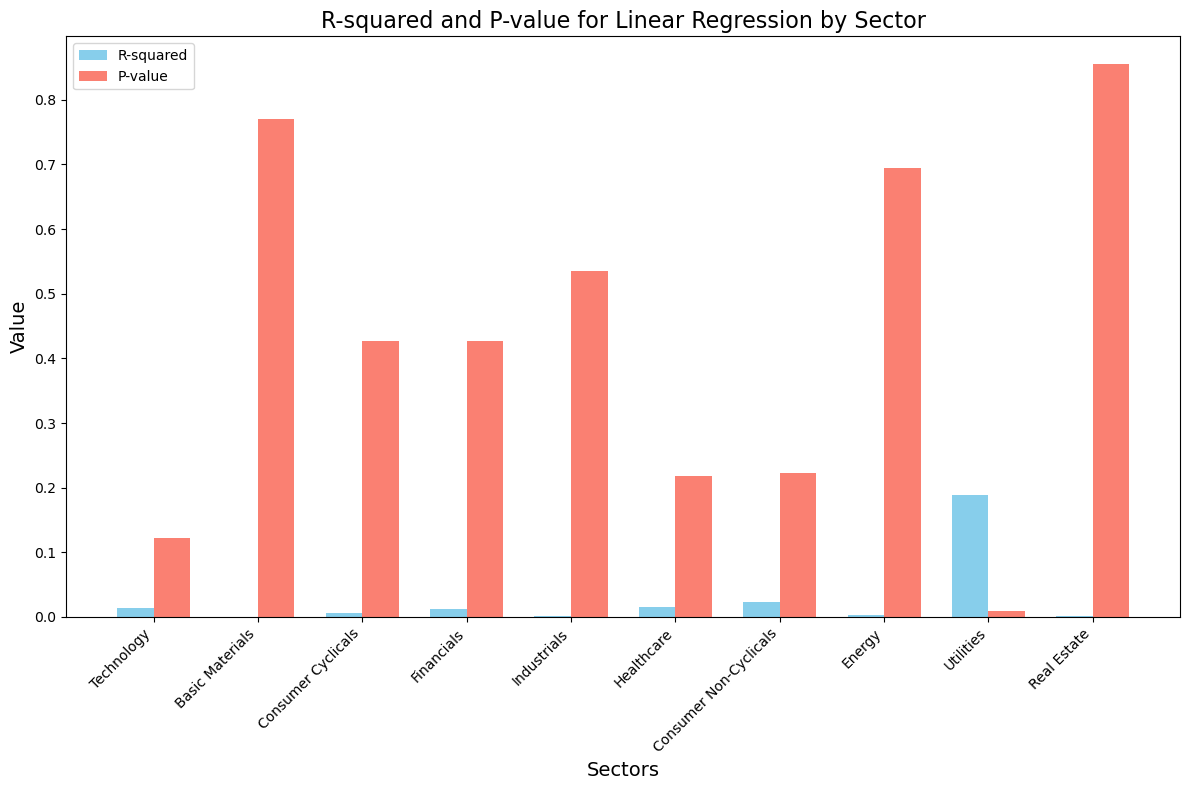

In [24]:
sectors = list(regression_results.keys())
r_squared_values = [result['R-squared'] for result in regression_results.values()]
p_values = [result['P-value'] for result in regression_results.values()]

# Set the width of the bars
bar_width = 0.35

# Set the position of the bars on the x-axis
x = np.arange(len(sectors))

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot R-squared values
ax.bar(x - bar_width/2, r_squared_values, bar_width, label='R-squared', color='skyblue')

# Plot p-values
ax.bar(x + bar_width/2, p_values, bar_width, label='P-value', color='salmon')

# Set labels and title
ax.set_xlabel('Sectors', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.set_title('R-squared and P-value for Linear Regression by Sector', fontsize=16)

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(sectors, rotation=45, ha='right')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

    Identifier                                       Company Name  \
0    002405.SZ                                     NavInfo Co Ltd   
1    002410.SZ                                      Glodon Co Ltd   
2    300088.SZ                         Wuhu Token Sciences Co Ltd   
3    002415.SZ       Hangzhou Hikvision Digital Technology Co Ltd   
4    002416.SZ                             Shenzhen Aisidi Co Ltd   
..         ...                                                ...   
953  002244.SZ         Hangzhou Binjiang Real Estate Group Co Ltd   
954  601512.SS  China-Singapore Suzhou Industrial Park Develop...   
955  002818.SZ        Chengdu Fusen Noble-House Industrial Co Ltd   
956  601155.SS                             Seazen Holdings Co Ltd   
957  001979.SZ  China Merchants Shekou Industrial Zone Holding...   

    Country of Exchange TRBC Economic Sector Name  ESG Score\n(FY0)       ROC  
0                 China                Technology         46.666945 -0.079524  
1          

<Figure size 1000x800 with 0 Axes>

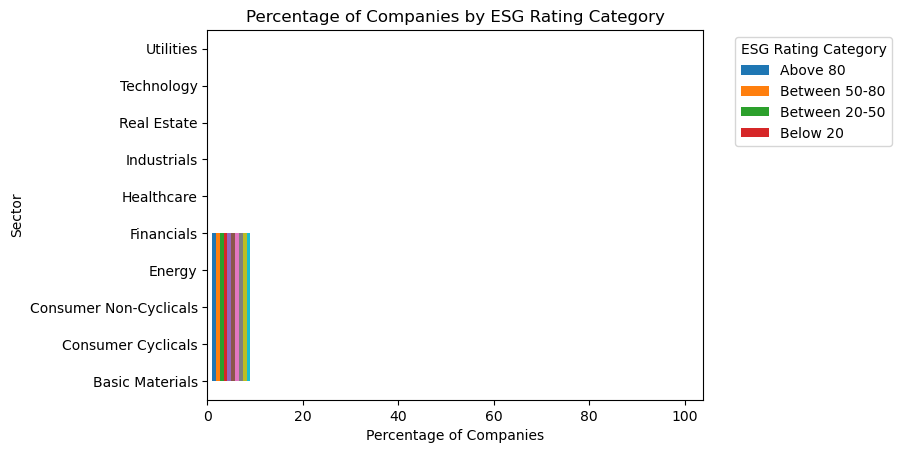

In [30]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dictionary named dfs containing DataFrames with sector names as keys

# Concatenate all DataFrames and add 'Sector' column
concatenated_data = pd.concat(dfs.values(), ignore_index=True)

print(concatenated_data)

# Calculate the percentage of companies falling into each rating category for each sector
def calculate_percentage_by_rating(df):
    rating_counts = df['ESG Score\n(FY0)'].value_counts(normalize=True) 
    above_80 = rating_counts.get(100, 0)  # Percentage of companies rated above 80
    between_50_80 = rating_counts.get((50, 80), 0)  # Percentage of companies rated between 50 and 80
    between_20_50 = rating_counts.get((20, 50), 0)  # Percentage of companies rated between 20 and 50
    below_20 = rating_counts.get(20, 0)  # Percentage of companies rated below 20
    return above_80, between_50_80, between_20_50, below_20

# Group by sector and calculate the percentages for each sector
sector_percentages = concatenated_data.groupby('TRBC Economic Sector Name').apply(calculate_percentage_by_rating)
sector_percentages_df = pd.DataFrame(sector_percentages.tolist(), index=sector_percentages.index, columns=['Above 80', 'Between 50-80', 'Between 20-50', 'Below 20'])

# Plotting the horizontal histogram
plt.figure(figsize=(10, 8))
sector_percentages_df.plot(kind='barh', stacked=True)
plt.xlabel('Percentage of Companies')
plt.ylabel('Sector')
plt.title('Percentage of Companies by ESG Rating Category')
plt.hist(sector_percentages, bins=10, range=(0, 100))
plt.legend(title='ESG Rating Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [32]:
from sklearn.neighbors import NearestNeighbors

In [33]:
concatenated_data = pd.concat(dfs.values(), ignore_index=True)

# Drop non-numeric columns before fitting the KNN model
numeric_data = concatenated_data[['ESG Score\n(FY0)', 'ROC']]

# Initialize NearestNeighbors model with k=2 (to find the 2 nearest neighbors)
knn_model = NearestNeighbors(n_neighbors=2, algorithm='auto')

# Fit the model using only numeric columns
knn_model.fit(numeric_data)

# Find the nearest neighbors for each row
distances, indices = knn_model.kneighbors(numeric_data)

# Display the original DataFrame with non-numeric columns for the nearest neighbors
print("Nearest Neighbors:")
for i, row_indices in enumerate(indices):
    print(f"\nRow {i} Nearest Neighbors:")
    for j, idx in enumerate(row_indices):
        print(f"Neighbor {j}:")
        print(concatenated_data.loc[idx])

Nearest Neighbors:

Row 0 Nearest Neighbors:
Neighbor 0:
Identifier                        002405.SZ
Company Name                 NavInfo Co Ltd
Country of Exchange                   China
TRBC Economic Sector Name        Technology
ESG Score\n(FY0)                  46.666945
ROC                               -0.079524
Name: 0, dtype: object
Neighbor 1:
Identifier                                        002583.SZ
Company Name                 Hytera Communications Corp Ltd
Country of Exchange                                   China
TRBC Economic Sector Name                        Technology
ESG Score\n(FY0)                                  46.635774
ROC                                                0.031043
Name: 19, dtype: object

Row 1 Nearest Neighbors:
Neighbor 0:
Identifier                       002410.SZ
Company Name                 Glodon Co Ltd
Country of Exchange                  China
TRBC Economic Sector Name       Technology
ESG Score\n(FY0)                 67.773023
ROC    

Identifier                                        688032.SS
Company Name                 Hoymiles Power Electronics Inc
Country of Exchange                                   China
TRBC Economic Sector Name                       Industrials
ESG Score\n(FY0)                                  42.067611
ROC                                                0.089914
Name: 535, dtype: object

Row 916 Nearest Neighbors:
Neighbor 0:
Identifier                                             601985.SS
Company Name                 China National Nuclear Power Co Ltd
Country of Exchange                                        China
TRBC Economic Sector Name                              Utilities
ESG Score\n(FY0)                                       48.285968
ROC                                                      0.05353
Name: 916, dtype: object
Neighbor 1:
Identifier                                                     601669.SS
Company Name                 Power Construction Corporation of China Ltd
Co

In [34]:
concatenated_data = pd.concat([df[['ESG Score\n(FY0)', 'ROC', 'TRBC Economic Sector Name']] for df in dfs.values()], ignore_index=True)

# Initialize NearestNeighbors model with k=10
knn_model = NearestNeighbors(n_neighbors=10, algorithm='auto')

knn_model.fit(concatenated_data[['ESG Score\n(FY0)', 'ROC']])

distances, indices = knn_model.kneighbors(concatenated_data[['ESG Score\n(FY0)', 'ROC']])

# Group samples with high correlation between 'ESG Score\n(FY0)' and 'ROC'
high_correlation_samples = []
for i, row_indices in enumerate(indices):
    correlation = concatenated_data.iloc[row_indices].corr(numeric_only=True).iloc[0, 1]
    if abs(correlation) >= 0.8:  # Adjust the threshold as needed
        high_correlation_samples.append(row_indices)

# Display the grouped samples with 'TRBC Economic Sector Name'
print("Groups of 10 samples with high correlation between 'ESG Score\n(FY0)' and 'ROC':")
for i, group in enumerate(high_correlation_samples):
    print(f"Group {i + 1}:")
    for idx in group:
        print(concatenated_data.iloc[idx])
    print()

Groups of 10 samples with high correlation between 'ESG Score
(FY0)' and 'ROC':
Group 1:
ESG Score\n(FY0)              22.063096
ROC                            0.123946
TRBC Economic Sector Name    Technology
Name: 4, dtype: object
ESG Score\n(FY0)                   21.974199
ROC                                 0.075834
TRBC Economic Sector Name    Basic Materials
Name: 213, dtype: object
ESG Score\n(FY0)               22.052817
ROC                             0.013229
TRBC Economic Sector Name    Industrials
Name: 591, dtype: object
ESG Score\n(FY0)                          21.978291
ROC                                        0.051333
TRBC Economic Sector Name    Consumer Non-Cyclicals
Name: 831, dtype: object
ESG Score\n(FY0)               22.065592
ROC                             0.000123
TRBC Economic Sector Name    Industrials
Name: 559, dtype: object
ESG Score\n(FY0)              21.902897
ROC                            0.107951
TRBC Economic Sector Name    Healthcare
Name: 688, 

In [35]:
high_correlation_samples

[array([  4, 213, 591, 831, 559, 688, 106, 568, 809, 624])]

In [36]:
sector_distribution = {}
for group in high_correlation_samples:
    sectors = concatenated_data.iloc[group]['TRBC Economic Sector Name']
    for sector in sectors:
        if sector not in sector_distribution:
            sector_distribution[sector] = 1
        else:
            sector_distribution[sector] += 1

In [37]:
sector_distribution

{'Technology': 2,
 'Basic Materials': 1,
 'Industrials': 4,
 'Consumer Non-Cyclicals': 2,
 'Healthcare': 1}

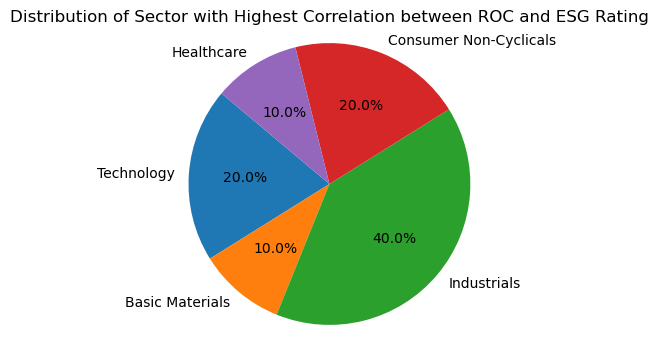

In [38]:
sectors = list(sector_distribution.keys())
counts = list(sector_distribution.values())

plt.figure(figsize=(4, 4))
plt.pie(counts, labels=sectors, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Sector with Highest Correlation between ROC and ESG Rating")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

[133 128 185 900 517 460 409 733  95  72]


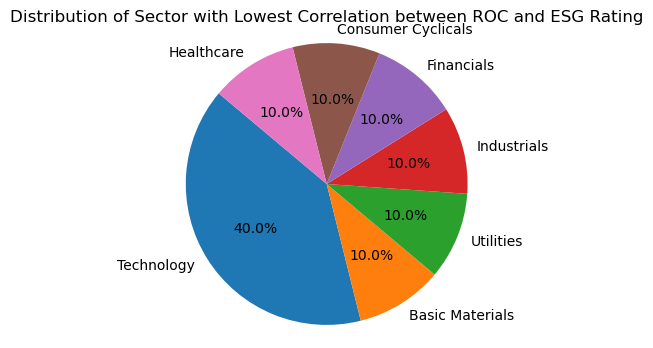

In [39]:
knn_model = NearestNeighbors(n_neighbors=10, algorithm='auto')

# Fit the model
knn_model.fit(concatenated_data[['ESG Score\n(FY0)', 'ROC']])

# Find the 20 nearest neighbors for each row based on 'ESG Score\n(FY0)' and 'ROC'
distances, indices = knn_model.kneighbors(concatenated_data[['ESG Score\n(FY0)', 'ROC']])

# Calculate correlation for each group
correlations = [abs(concatenated_data.iloc[group].corr(numeric_only=True).iloc[0, 1]) for group in indices]

# Get the group with the lowest absolute correlation
lowest_correlation_group_index = correlations.index(min(correlations))
lowest_correlation_samples = indices[lowest_correlation_group_index]
print(lowest_correlation_samples)

# Calculate distribution of 'TRBC Economic Sector Name' within the group
sector_distribution = {}
sectors = concatenated_data.iloc[lowest_correlation_samples]['TRBC Economic Sector Name']
for sector in sectors:
    if sector not in sector_distribution:
        sector_distribution[sector] = 1
    else:
        sector_distribution[sector] += 1

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sector_distribution.values(), labels=sector_distribution.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Sector with Lowest Correlation between ROC and ESG Rating")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

/var/folders/bh/0km11nqd4mjchgy6dj99ptf80000gn/T/ipykernel_56014/1069349680.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = group_data.corr().iloc[0, 1]  # Assuming you're interested in the correlation between the first two columns


Group 177 - Correlation: 0.7628769868407582
     ESG Score\n(FY0)       ROC TRBC Economic Sector Name
176         69.239549  0.199118           Basic Materials
777         69.147677  0.178992    Consumer Non-Cyclicals
273         69.154312  0.067049           Basic Materials
257         68.949246  0.014283           Basic Materials
64          68.812470  0.096477                Technology
91          69.720121  0.403006                Technology
421         68.720266  0.067804        Consumer Cyclicals
580         68.695127  0.051869               Industrials
640         68.497380  0.004569               Industrials
781         68.473538  0.151963    Consumer Non-Cyclicals

Group 778 - Correlation: 0.7628769868407543
     ESG Score\n(FY0)       ROC TRBC Economic Sector Name
777         69.147677  0.178992    Consumer Non-Cyclicals
176         69.239549  0.199118           Basic Materials
273         69.154312  0.067049           Basic Materials
257         68.949246  0.014283          

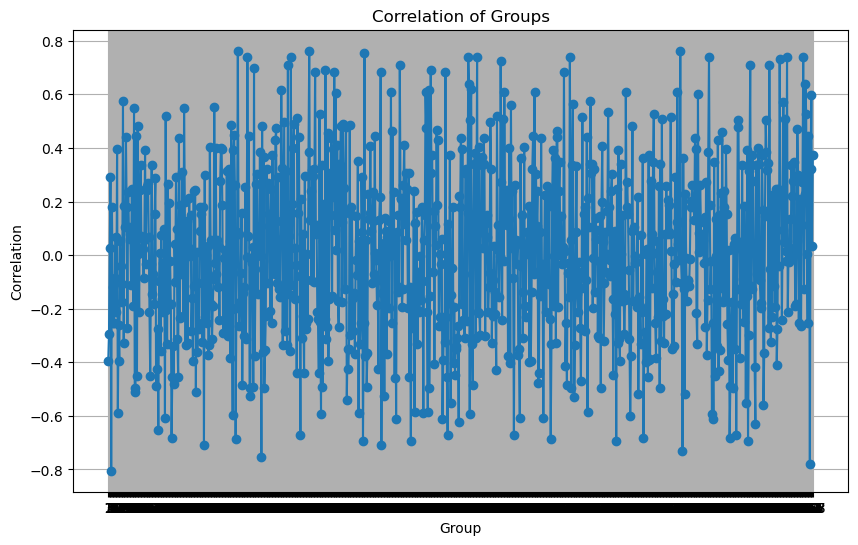

In [40]:
knn_model = NearestNeighbors(n_neighbors=10, algorithm='auto')

# Fit the model
knn_model.fit(concatenated_data[['ESG Score\n(FY0)', 'ROC']])  # Exclude the first column which might be an index or ID column

# Find the 10 nearest neighbors for each row
distances, indices = knn_model.kneighbors(concatenated_data[['ESG Score\n(FY0)', 'ROC']])  # Exclude the first column which might be an index or ID column

# Calculate correlations for each group
correlations = []
for group_indices in indices:
    group_data = concatenated_data.iloc[group_indices]
    correlation = group_data.corr().iloc[0, 1]  # Assuming you're interested in the correlation between the first two columns
    correlations.append(correlation)

# Sort groups based on correlation in descending order
sorted_indices = sorted(range(len(correlations)), key=lambda i: correlations[i], reverse=True)

# Display groups from highest to lowest correlation
for idx in sorted_indices:
    print(f"Group {idx + 1} - Correlation: {correlations[idx]}")
    print(concatenated_data.iloc[indices[idx]])
    print()

# Plotting the correlation values
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(correlations) + 1), correlations, marker='o', linestyle='-')
plt.xlabel('Group')
plt.ylabel('Correlation')
plt.title('Correlation of Groups')
plt.xticks(range(1, len(correlations) + 1))
plt.grid(True)
plt.show()

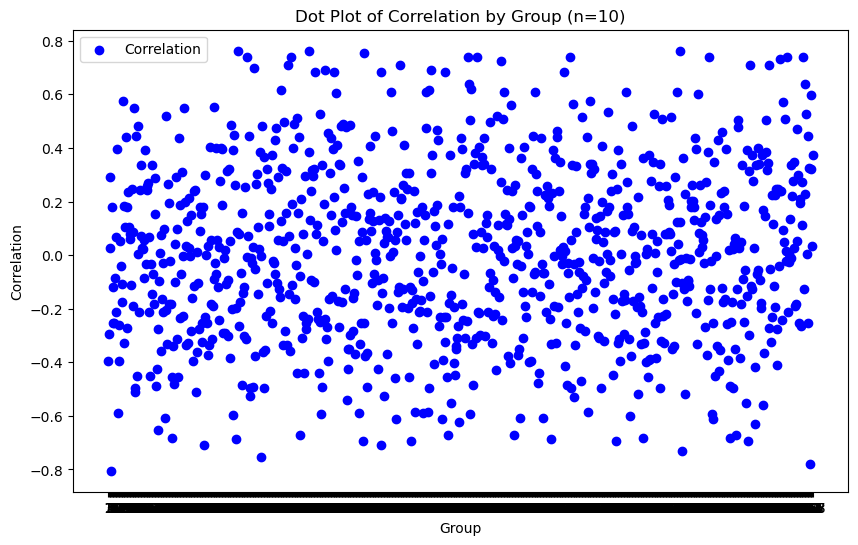

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(correlations) + 1), correlations, marker='o', color='blue', label='Correlation')
plt.xlabel('Group')
plt.ylabel('Correlation')
plt.title('Dot Plot of Correlation by Group (n=10)')
plt.xticks(range(1, len(correlations) + 1))
plt.grid(False)
plt.legend()
plt.show()

/var/folders/bh/0km11nqd4mjchgy6dj99ptf80000gn/T/ipykernel_15136/857852672.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = group_data.corr().iloc[0, 1]  # Assuming you're interested in the correlation between the first two columns


Group 644 - Correlation: 0.24837897138773543
     ESG Score\n(FY0)       ROC TRBC Economic Sector Name
643         44.749890 -0.003784               Industrials
503         44.923502  0.064345               Industrials
385         44.654926  0.168322        Consumer Cyclicals
473         44.547129 -0.010170                Financials
768         44.602466 -0.250425                Healthcare
..                ...       ...                       ...
159         47.690477 -0.037772                Technology
799         47.678709  0.356155    Consumer Non-Cyclicals
416         41.761481  0.041764        Consumer Cyclicals
736         47.737675  0.127869                Healthcare
324         47.742174 -0.028904           Basic Materials

[100 rows x 3 columns]

Group 504 - Correlation: 0.23245446272165685
     ESG Score\n(FY0)       ROC TRBC Economic Sector Name
503         44.923502  0.064345               Industrials
643         44.749890 -0.003784               Industrials
194         45.

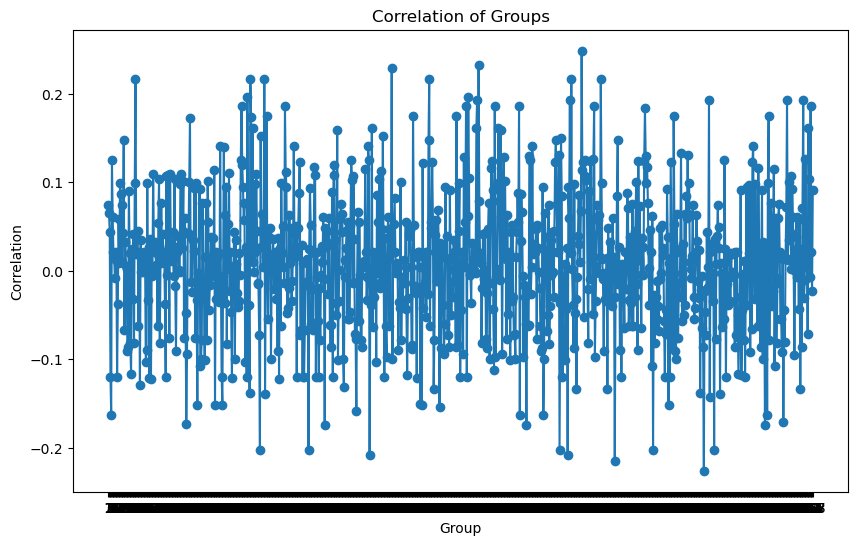

In [83]:
knn_model = NearestNeighbors(n_neighbors=100, algorithm='auto')

# Fit the model
knn_model.fit(concatenated_data[['ESG Score\n(FY0)', 'ROC']])  # Exclude the first column which might be an index or ID column

# Find the 10 nearest neighbors for each row
distances, indices = knn_model.kneighbors(concatenated_data[['ESG Score\n(FY0)', 'ROC']])  # Exclude the first column which might be an index or ID column

# Calculate correlations for each group
correlations = []
for group_indices in indices:
    group_data = concatenated_data.iloc[group_indices]
    correlation = group_data.corr().iloc[0, 1]  # Assuming you're interested in the correlation between the first two columns
    correlations.append(correlation)

# Sort groups based on correlation in descending order
sorted_indices = sorted(range(len(correlations)), key=lambda i: correlations[i], reverse=True)

# Display groups from highest to lowest correlation
for idx in sorted_indices:
    print(f"Group {idx + 1} - Correlation: {correlations[idx]}")
    print(concatenated_data.iloc[indices[idx]])
    print()

# Plotting the correlation values
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(correlations) + 1), correlations, marker='o', linestyle='-')
plt.xlabel('Group')
plt.ylabel('Correlation')
plt.title('Correlation of Groups')
plt.xticks(range(1, len(correlations) + 1))
plt.grid(False)
plt.show()

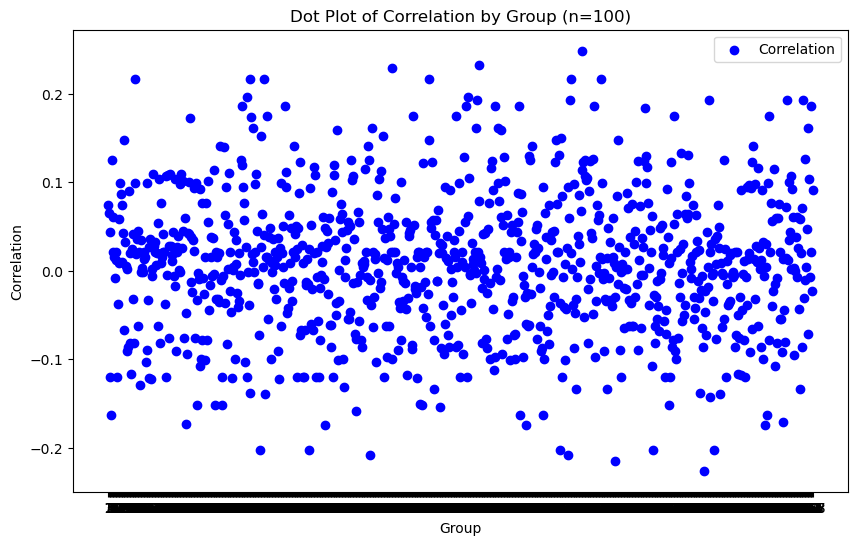

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(correlations) + 1), correlations, marker='o', color='blue', label='Correlation')
plt.xlabel('Group')
plt.ylabel('Correlation')
plt.title('Dot Plot of Correlation by Group (n=100)')
plt.xticks(range(1, len(correlations) + 1))
plt.grid(False)
plt.legend()
plt.show()

In [88]:
concatenated_data = pd.concat(dfs.values(), ignore_index=True)
concatenated_data_sorted = concatenated_data.sort_values(by='ESG Score\n(FY0)', ascending=False)

top_ten_highest_esg = concatenated_data_sorted.head(10)

lowest_ten_esg = concatenated_data_sorted.tail(10)

print("Top Ten Highest ESG Ratings:")
print(top_ten_highest_esg)
print("\nLowest Ten ESG Ratings:")
print(lowest_ten_esg)

Top Ten Highest ESG Ratings:
    Identifier                                Company Name  \
305  601899.SS                   Zijin Mining Group Co Ltd   
12   002475.SZ          Luxshare Precision Industry Co Ltd   
154  000063.SZ                                    ZTE Corp   
839  300999.SZ         Yihai Kerry Arawana Holdings Co Ltd   
697  600196.SS  Shanghai Fosun Pharmaceutical Group Co Ltd   
266  600282.SS                 NanJing Iron & Steel Co Ltd   
256  600019.SS                 Baoshan Iron & Steel Co Ltd   
286  600549.SS                      Xiamen Tungsten Co Ltd   
865  601088.SS                 China Shenhua Energy Co Ltd   
188  603993.SS                              CMOC Group Ltd   

    Country of Exchange TRBC Economic Sector Name  ESG Score\n(FY0)       ROC  
305               China           Basic Materials         92.345219  0.116484  
12                China                Technology         91.471631  0.176165  
154               China                Technolog

In [89]:
top_ten_highest_esg

,Identifier,Company Name,Country of Exchange,TRBC Economic Sector Name,ESG Score\n(FY0),ROC
305,601899.SS,Zijin Mining Group Co Ltd,China,Basic Materials,92.345219,0.116484
12,002475.SZ,Luxshare Precision Industry Co Ltd,China,Technology,91.471631,0.176165
154,000063.SZ,ZTE Corp,China,Technology,89.479682,0.082531
839,300999.SZ,Yihai Kerry Arawana Holdings Co Ltd,China,Consumer Non-Cyclicals,86.973112,0.025878
697,600196.SS,Shanghai Fosun Pharmaceutical Group Co Ltd,China,Healthcare,85.504826,0.058814
266,600282.SS,NanJing Iron & Steel Co Ltd,China,Basic Materials,84.926662,0.054120
256,600019.SS,Baoshan Iron & Steel Co Ltd,China,Basic Materials,84.899480,0.052836
286,600549.SS,Xiamen Tungsten Co Ltd,China,Basic Materials,84.135604,0.100574
865,601088.SS,China Shenhua Energy Co Ltd,China,Energy,81.759618,0.149040
188,603993.SS,CMOC Group Ltd,China,Basic Materials,81.060573,0.029504


In [90]:
lowest_ten_esg

,Identifier,Company Name,Country of Exchange,TRBC Economic Sector Name,ESG Score\n(FY0),ROC
852,600395.SS,Guizhou Panjiang Refined Coal Co Ltd,China,Energy,7.430938,0.061016
390,600037.SS,Beijing Gehua CATV Network Co Ltd,China,Consumer Cyclicals,7.100854,-0.005504
49,300604.SZ,Hangzhou Changchuan Technology Co Ltd,China,Technology,7.035572,0.065688
350,601928.SS,Jiangsu Phoenix Publishing & Media Corp Ltd,China,Consumer Cyclicals,6.918796,0.112486
433,002670.SZ,Guosheng Financial Holding Inc,China,Financials,5.817592,-0.018356
422,000559.SZ,Wanxiang Qianchao Co Ltd,China,Consumer Cyclicals,5.735410,0.080306
284,600529.SS,Shandong Pharmaceutical Glass Co Ltd,China,Basic Materials,5.562800,0.105599
502,002690.SZ,Hefei Meyer Optoelectronic Technology Inc,China,Industrials,4.854925,0.279952
75,603893.SS,Rockchip Electronics Co Ltd,China,Technology,4.816903,0.033698
42,600959.SS,Jiangsu Broadcasting Cable Information Network...,China,Technology,4.425372,0.017520


In [95]:
def compare_roc_with_mean(row):
    sector_mean_roc = mean_roc_by_sector[row['TRBC Economic Sector Name']]
    return 'Above Mean' if row['ROC'] > sector_mean_roc else 'Below Mean'

In [97]:
top_ten_highest_esg = concatenated_data_sorted.head(10).copy() 
lowest_ten_esg = concatenated_data_sorted.tail(10).copy() 
mean_roc_by_sector = concatenated_data.groupby('TRBC Economic Sector Name')['ROC'].mean()
top_ten_highest_esg['ROC_Comparison'] = top_ten_highest_esg.apply(compare_roc_with_mean, axis=1)
lowest_ten_esg['ROC_Comparison'] = lowest_ten_esg.apply(compare_roc_with_mean, axis=1)

In [98]:
top_ten_highest_esg

,Identifier,Company Name,Country of Exchange,TRBC Economic Sector Name,ESG Score\n(FY0),ROC,ROC_Comparison
305,601899.SS,Zijin Mining Group Co Ltd,China,Basic Materials,92.345219,0.116484,Above Mean
12,002475.SZ,Luxshare Precision Industry Co Ltd,China,Technology,91.471631,0.176165,Above Mean
154,000063.SZ,ZTE Corp,China,Technology,89.479682,0.082531,Above Mean
839,300999.SZ,Yihai Kerry Arawana Holdings Co Ltd,China,Consumer Non-Cyclicals,86.973112,0.025878,Below Mean
697,600196.SS,Shanghai Fosun Pharmaceutical Group Co Ltd,China,Healthcare,85.504826,0.058814,Below Mean
266,600282.SS,NanJing Iron & Steel Co Ltd,China,Basic Materials,84.926662,0.054120,Below Mean
256,600019.SS,Baoshan Iron & Steel Co Ltd,China,Basic Materials,84.899480,0.052836,Below Mean
286,600549.SS,Xiamen Tungsten Co Ltd,China,Basic Materials,84.135604,0.100574,Above Mean
865,601088.SS,China Shenhua Energy Co Ltd,China,Energy,81.759618,0.149040,Above Mean
188,603993.SS,CMOC Group Ltd,China,Basic Materials,81.060573,0.029504,Below Mean


In [99]:
lowest_ten_esg

,Identifier,Company Name,Country of Exchange,TRBC Economic Sector Name,ESG Score\n(FY0),ROC,ROC_Comparison
852,600395.SS,Guizhou Panjiang Refined Coal Co Ltd,China,Energy,7.430938,0.061016,Below Mean
390,600037.SS,Beijing Gehua CATV Network Co Ltd,China,Consumer Cyclicals,7.100854,-0.005504,Below Mean
49,300604.SZ,Hangzhou Changchuan Technology Co Ltd,China,Technology,7.035572,0.065688,Above Mean
350,601928.SS,Jiangsu Phoenix Publishing & Media Corp Ltd,China,Consumer Cyclicals,6.918796,0.112486,Above Mean
433,002670.SZ,Guosheng Financial Holding Inc,China,Financials,5.817592,-0.018356,Below Mean
422,000559.SZ,Wanxiang Qianchao Co Ltd,China,Consumer Cyclicals,5.735410,0.080306,Above Mean
284,600529.SS,Shandong Pharmaceutical Glass Co Ltd,China,Basic Materials,5.562800,0.105599,Above Mean
502,002690.SZ,Hefei Meyer Optoelectronic Technology Inc,China,Industrials,4.854925,0.279952,Above Mean
75,603893.SS,Rockchip Electronics Co Ltd,China,Technology,4.816903,0.033698,Below Mean
42,600959.SS,Jiangsu Broadcasting Cable Information Network...,China,Technology,4.425372,0.017520,Below Mean
